# Python Decision Making Tree Regression I-Phone Purchasing Data

# Python Decision Making Tree Regression I-Phone Purchasing Data

In [3]:
# Firstly We Have to IMPORT the Libraries -
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Importing the Data from our system - 
data = pd.read_csv('D:/Top Mentor/Classes Details/4th May/Files/Decision Tree  - Assignment -4/iphone_purchase_records.csv')
data.head(2)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0


In [5]:
## Firstly We have to copy this data as our data keep safe - 
df = data.copy()
print(df.head(2))

  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0


In [6]:
## Reading data & Checking basic features of data - 
print('DataSet Information -\n',df.describe())

DataSet Information -
               Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000


In [7]:
#  Checking Data Information 
df.info()
# Checking Null Value -
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [8]:
##Checking Data Parameter :-
print('no of columns - ' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))

no of columns -  Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')
no of shapes -  (400, 4)
no of lenght -  400


In [9]:
## The dataset contains 400 entries and 4 columns:

# Gender: Categorical feature indicating the gender of the individual.
# Age: Numeric feature representing the age of the individual.
# Salary: Numeric feature representing the salary of the individual.
# Purchase Iphone: Target variable, where 0 indicates no purchase, and 1 indicates a purchase.

In [10]:
### Now we are encoding the gender column as Male = 1 & Female = 0

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [12]:
print(df.columns)

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')


In [13]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [14]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
print(df['Gender'].unique())

[1 0]


In [16]:
## Now we starting the training & Testing for data - y-(  0 No  - 1-Yes)
X = df[['Gender','Age','Salary']]
y =df['Purchase Iphone'] 

In [17]:
X.head()

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchase Iphone, dtype: int64

In [24]:
X_train , X_test , y_train ,y_test =train_test_split(X,y,test_size=0.2 ,random_state=1234)

In [25]:
X_train.shape , y_train.shape

((320, 3), (320,))

In [26]:
X_test.shape , y_test.shape

((80, 3), (80,))

In [27]:
model = DecisionTreeClassifier(criterion='gini') #### gini (binary classes) / entropy (multiclass)
model_train = model.fit(X_train, y_train)
pred = model_train.predict(X_test)
results = accuracy_score(y_test,pred)*100
print("The accuracy of Decision Tree - ", results, "%")

The accuracy of Decision Tree -  85.0 %


In [28]:
model = DecisionTreeClassifier(criterion='entropy') #### gini (binary classes) / entropy (multiclass)
model_train = model.fit(X_train, y_train)
pred = model_train.predict(X_test)
results = accuracy_score(y_test,pred)*100
print("The accuracy of Decision Tree - ", results, "%")

The accuracy of Decision Tree -  81.25 %


In [29]:
model.feature_importances_

array([0.03299248, 0.49867024, 0.46833728])

<Axes: >

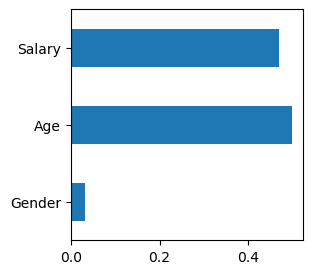

In [32]:
plt.figure(figsize=(3,3))
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.plot(kind = 'barh')

In [31]:
feat_importances

Gender    0.032992
Age       0.498670
Salary    0.468337
dtype: float64